### Dataset yang kami gunakan bersumber dari :
Link : https://www.kaggle.com/datasets/hopesb/student-depression-dataset/data

###Import Library

In [28]:

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and handling arrays
import seaborn as sns  # For creating statistical data visualizations
import matplotlib.pyplot as plt  # For general-purpose plotting
import tensorflow as tf # For building Models
from sklearn.preprocessing import StandardScaler  # For feature scaling and standardization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score  # For model evaluation metrics
from scipy.stats import zscore # For computing z-score
import warnings # For suppressing unnecessary warnings
import pickle # To save model
from sklearn.preprocessing import StandardScaler, LabelEncoder # For normalizing values and encoding
from sklearn.feature_selection import f_classif # To calculate ANOVA test values

warnings.filterwarnings("ignore")

# Import Dataset

In [29]:
df = pd.read_csv('Student Depression Dataset.csv')
df.columns = df.columns.str.strip()
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# Exploratory Data Analysis (EDA)

In [30]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [31]:
# Checking rows and columns
df.shape

(27901, 18)

In [32]:
# Checing non-null value counts and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [33]:
# Checking column names
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [34]:
# Checking datatypes
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [35]:
# Unique values count
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [36]:
# Count of missing values
missing = df.isnull().sum()
missing

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [37]:
# Percentage of missing values
per =  (missing / len(df)) * 100
per

id                                       0.000000
Gender                                   0.000000
Age                                      0.000000
City                                     0.000000
Profession                               0.000000
Academic Pressure                        0.000000
Work Pressure                            0.000000
CGPA                                     0.000000
Study Satisfaction                       0.000000
Job Satisfaction                         0.000000
Sleep Duration                           0.000000
Dietary Habits                           0.000000
Degree                                   0.000000
Have you ever had suicidal thoughts ?    0.000000
Work/Study Hours                         0.000000
Financial Stress                         0.010752
Family History of Mental Illness         0.000000
Depression                               0.000000
dtype: float64

In [38]:
# Dropping duplicates
df = df.drop_duplicates()
df.shape

(27901, 18)

In [39]:
# Dropping unnecessary column
df = df.drop(columns=['id','City','Profession','Work Pressure','Job Satisfaction','Degree'])
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0


In [40]:
# Binary Classification
binary = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for i in binary:
    df[i] = df[i].map({'Yes': 1, 'No': 0})
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,1,3.0,1.0,0,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,0,3.0,2.0,1,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,0,9.0,1.0,1,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,1,4.0,5.0,1,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,1,1.0,1.0,0,0


In [41]:
# Binary Classification
binary = ['Gender']
for i in binary:
    df[i] = df[i].map({'Male': 1, 'Female': 0})
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,8.97,2.0,5-6 hours,Healthy,1,3.0,1.0,0,1
1,0,24.0,2.0,5.90,5.0,5-6 hours,Moderate,0,3.0,2.0,1,0
2,1,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,0,9.0,1.0,1,0
3,0,28.0,3.0,5.59,2.0,7-8 hours,Moderate,1,4.0,5.0,1,1
4,0,25.0,4.0,8.13,3.0,5-6 hours,Moderate,1,1.0,1.0,0,0


In [42]:
# Ordinal Classification
ordinal = {
    'Sleep Duration': {'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4, 'Others': 0},
    'Dietary Habits': {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3, 'Others': 0}
}

for i, j in ordinal.items():
    df[i] = df[i].map(j)
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,8.97,2.0,2,3,1,3.0,1.0,0,1
1,0,24.0,2.0,5.90,5.0,2,2,0,3.0,2.0,1,0
2,1,31.0,3.0,7.03,5.0,1,3,0,9.0,1.0,1,0
3,0,28.0,3.0,5.59,2.0,3,2,1,4.0,5.0,1,1
4,0,25.0,4.0,8.13,3.0,2,2,1,1.0,1.0,0,0


In [43]:
# Change CGPA to 1-4 Scale

# Fungsi normalisasi Min-Max
def min_max_scaling(data, new_min, new_max):
    return (data - data.min()) / (data.max() - data.min()) * (new_max - new_min) + new_min

# Penerapan
df['CGPA'] = min_max_scaling(df['CGPA'], 1, 4)
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,3.691,2.0,2,3,1,3.0,1.0,0,1
1,0,24.0,2.0,2.770,5.0,2,2,0,3.0,2.0,1,0
2,1,31.0,3.0,3.109,5.0,1,3,0,9.0,1.0,1,0
3,0,28.0,3.0,2.677,2.0,3,2,1,4.0,5.0,1,1
4,0,25.0,4.0,3.439,3.0,2,2,1,1.0,1.0,0,0


In [44]:
# Handling missing values
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())
df.isnull().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

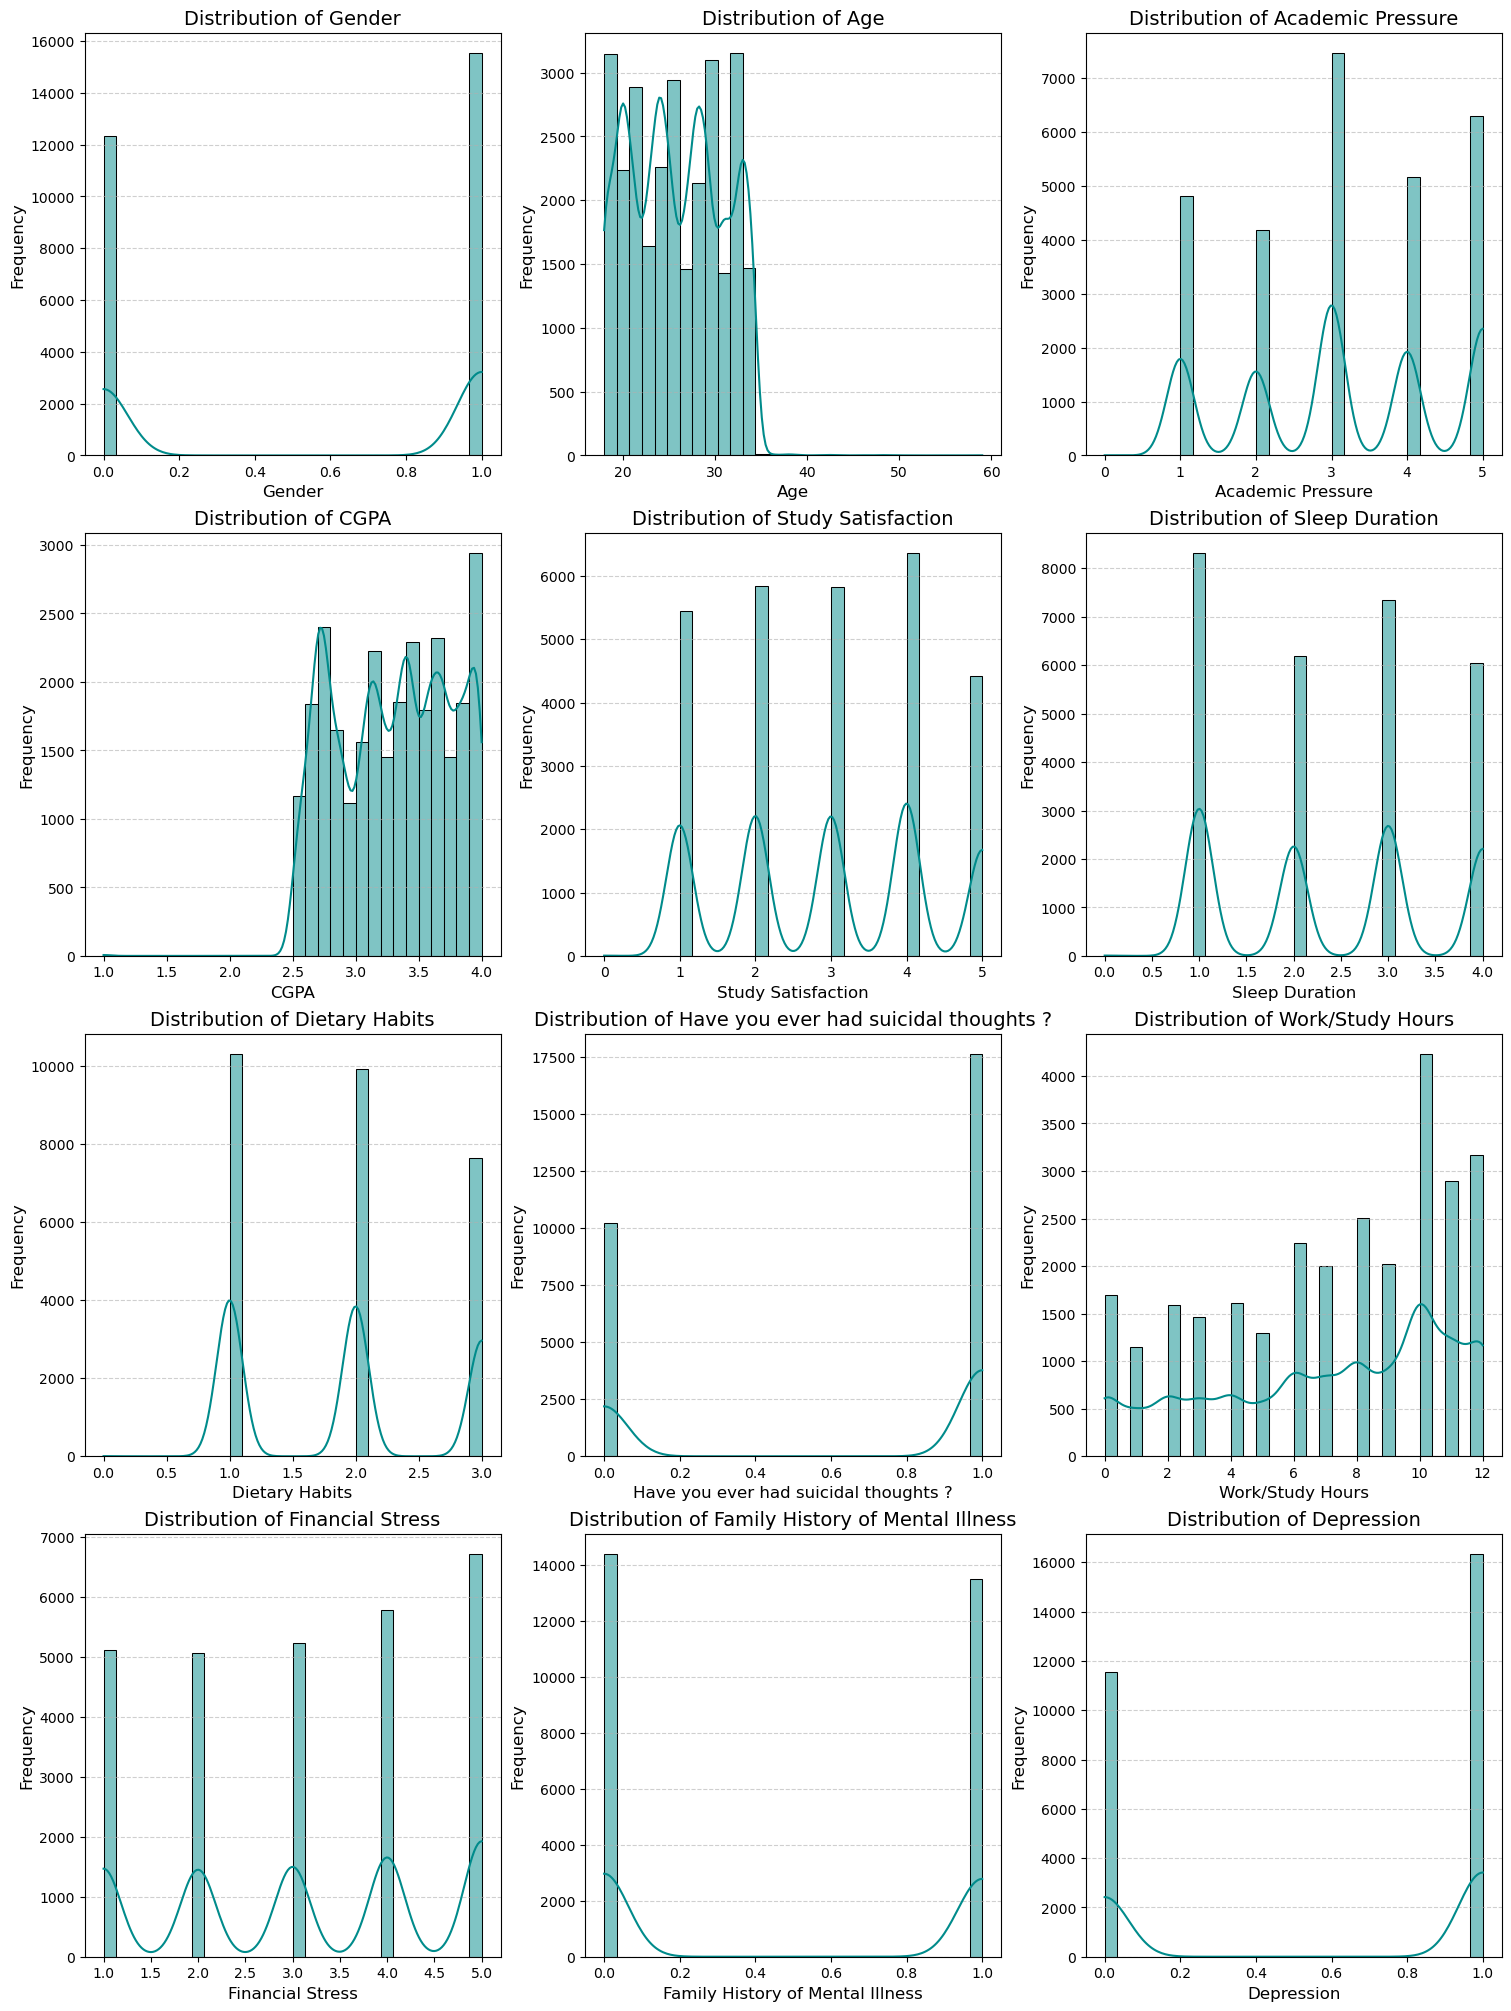

In [45]:
# Univariate Analysis: Numeric Features Distribution

numerical_columns = df.select_dtypes(include=['number']).columns

num_cols = len(numerical_columns)
cols = 3
rows = (num_cols + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)
axes = axes.flatten()

for i, j in enumerate(numerical_columns):
    sns.histplot(df[j], kde=True, bins=30,  color='darkcyan', ax=axes[i])
    axes[i].set_title(f"Distribution of {j}", fontsize=14)
    axes[i].set_xlabel(j, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_ylabel("Frequency", fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

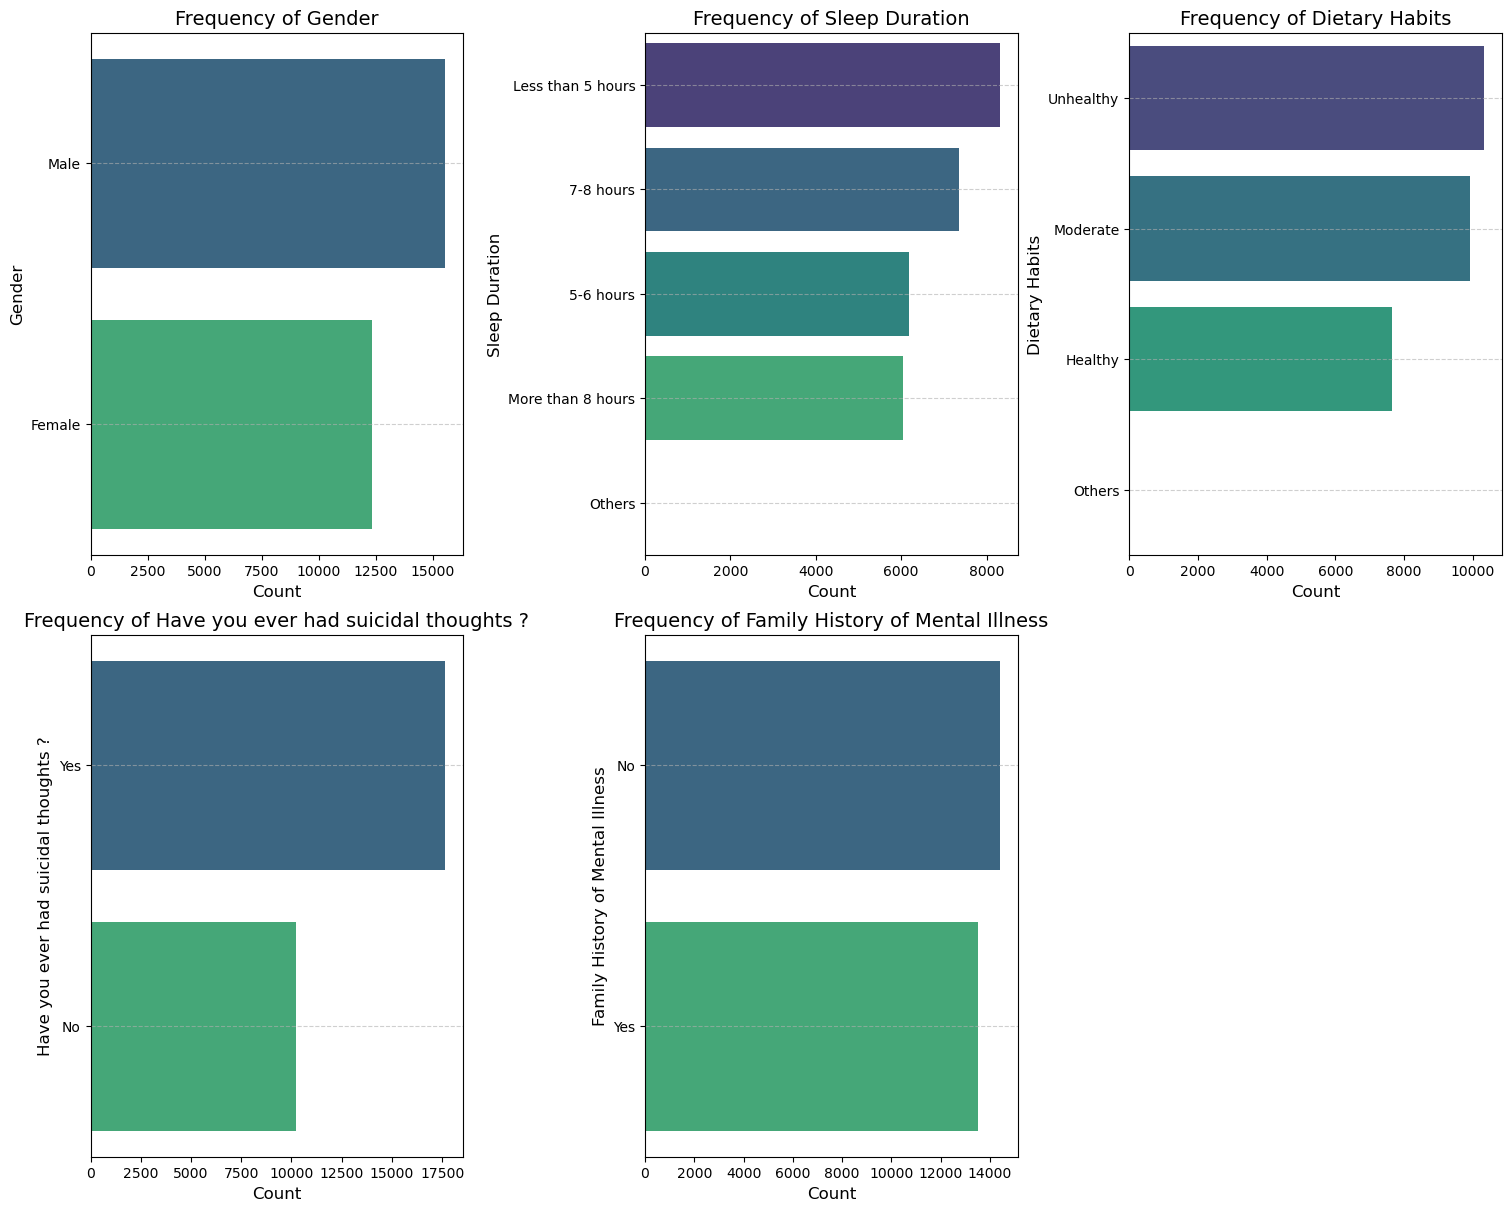

In [14]:
# Univariate Analysis: Categorical Features Distribution

categorical_columns = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_columns)
cols = 3
rows = (num_cols + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 6), constrained_layout=True)
axes = axes.flatten()

for i, j in enumerate(categorical_columns):
    sns.countplot(data=df, y=j, order=df[j].value_counts().index, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Frequency of {j}", fontsize=14)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_xlabel("Count", fontsize=12)
    axes[i].set_ylabel(j, fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

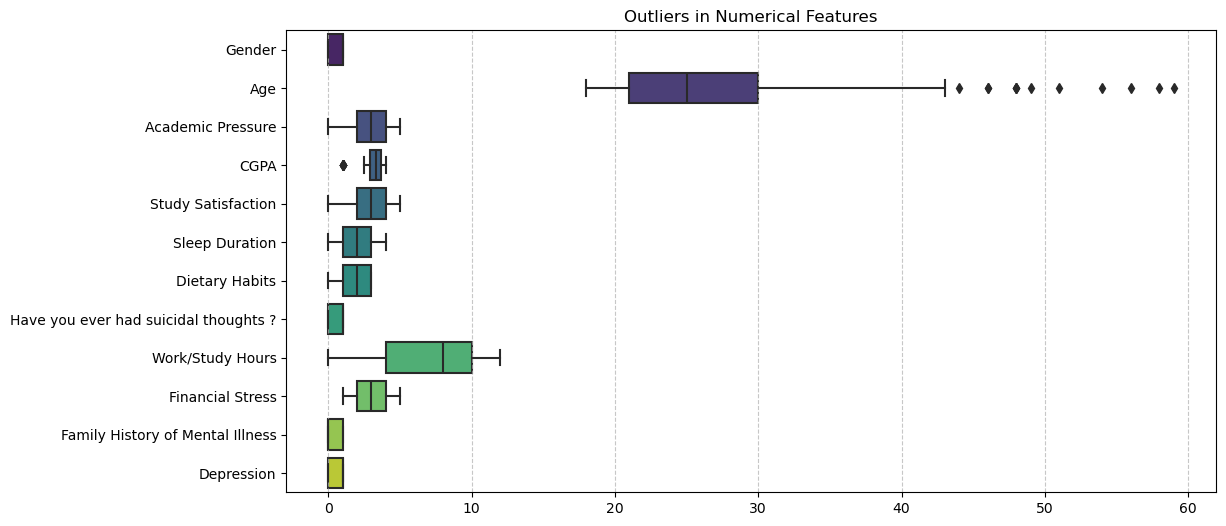

In [46]:
# Outlier Detection

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], orient='h', palette='viridis')

plt.title('Outliers in Numerical Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

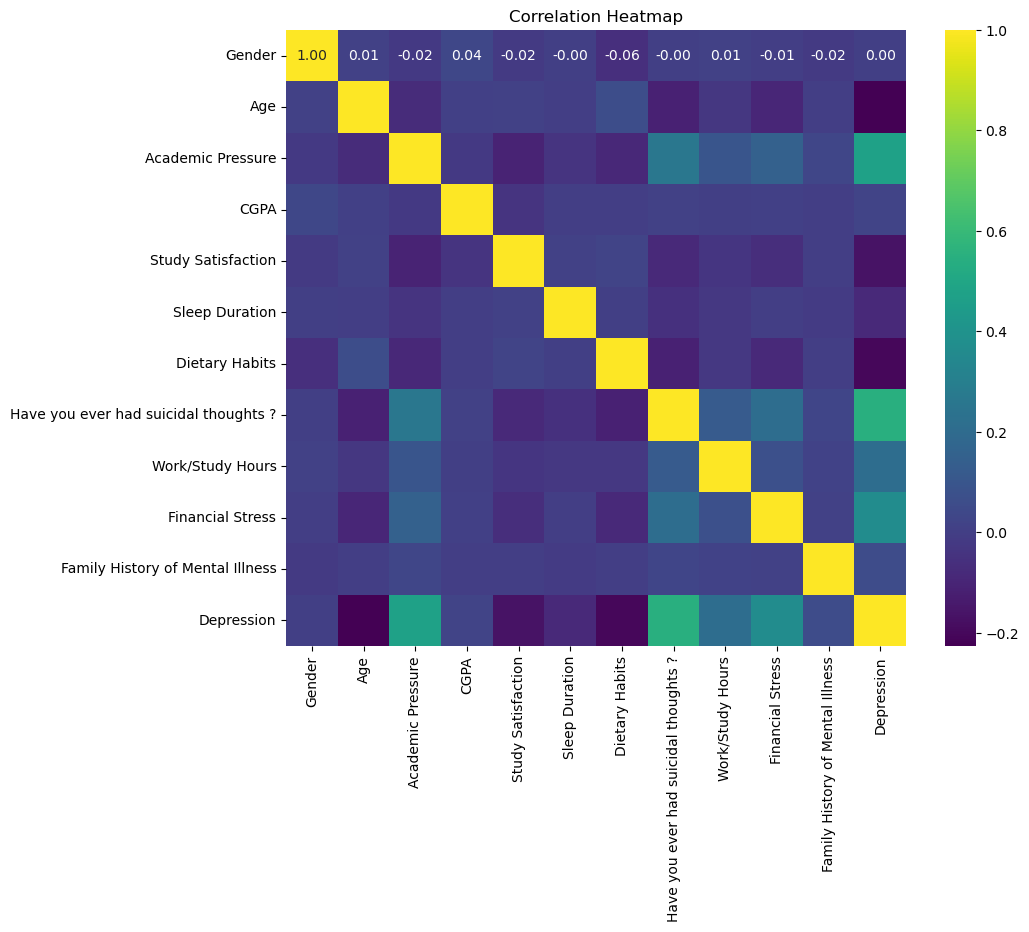

In [47]:
# Correlation Analysis

numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

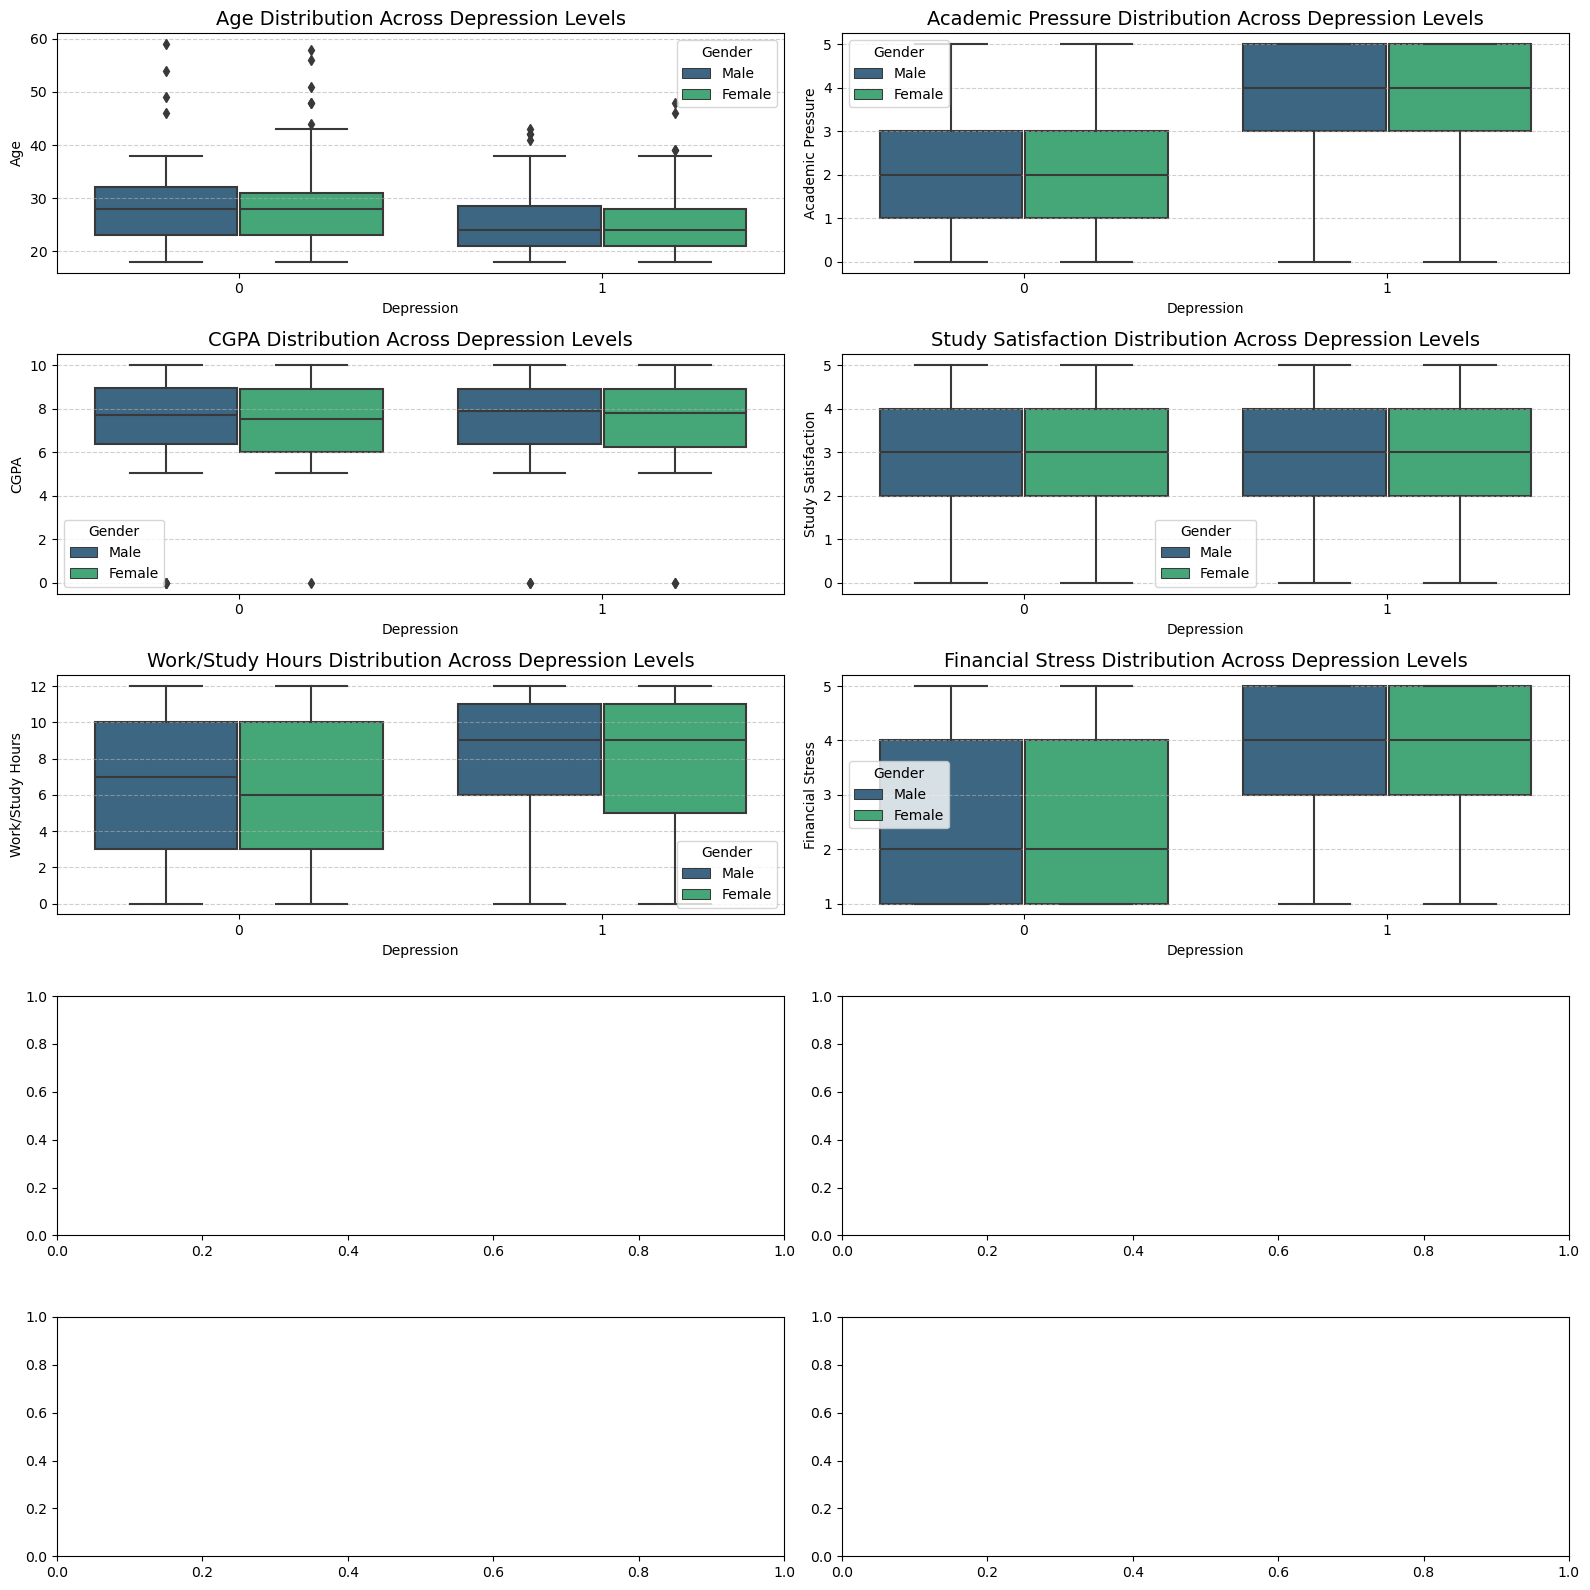

In [17]:
# Bivariate Analysis: Numerical Feature Distribution

n_cols = 2
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))
axes = axes.flatten()

for i, j in enumerate([col for col in numerical_columns if col != 'Depression']):
    sns.boxplot(x='Depression', y=j, data=df, hue='Gender', palette='viridis', ax=axes[i])
    axes[i].set_title(f'{j} Distribution Across Depression Levels', fontsize=14)
    axes[i].set_xlabel('Depression')
    axes[i].set_ylabel(j)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [48]:
# Grouped Aggregations

# Gender level
gender = df.groupby('Gender')[numerical_columns].mean().sort_values(by='Depression', ascending=False)
gender

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Gender,,,,,,,,,,,,
1,1.0,25.861967,3.113848,3.311006,2.924680,2.396797,1.860938,0.632276,7.199974,3.132823,0.476941,0.586287
0,0.0,25.772381,3.175652,3.278993,2.967946,2.398171,1.957261,0.633479,7.102882,3.148697,0.492796,0.584507


In [49]:
# Suicidal thoughts level
suicide = df.groupby('Have you ever had suicidal thoughts ?')[numerical_columns].mean().sort_values(by='Depression', ascending=False)
suicide

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Have you ever had suicidal thoughts ?,,,,,,,,,,,,
1,0.556751,25.398165,3.416402,3.299692,2.857272,2.350816,1.834730,1.0,7.499604,3.368826,0.493940,0.790496
0,0.558028,26.553245,2.666959,3.291901,3.093021,2.477696,2.022255,0.0,6.566520,2.745242,0.466764,0.232211


### Handlling Outliers

In [50]:
# Handling Outliers

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

#Compute Z-scores
z_scores = df[numerical_cols].apply(zscore)
print('-'*50)
print(df.shape)

# Filter the dataframe based on Z-scores
df_filtered = df[(z_scores < 3).all(axis=1)]


Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
--------------------------------------------------
(27901, 12)


### Data Splitting

In [51]:
# Memisahkan fitur (X) dan target (y)
X = df_filtered.drop(columns=['Depression'])
y = df_filtered['Depression']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Doing ANOVA Test to check importance of retained features

F_values, p_values = f_classif(X, y)
print(pd.Series(F_values, index=X.columns))

Gender                                       0.060858
Age                                       1502.523151
Academic Pressure                         8121.264310
CGPA                                        14.316492
Study Satisfaction                         809.857406
Sleep Duration                             210.673874
Dietary Habits                            1245.310813
Have you ever had suicidal thoughts ?    11890.954267
Work/Study Hours                          1264.641197
Financial Stress                          4249.109059
Family History of Mental Illness            80.435538
dtype: float64


### Feature Scalling

In [53]:
# Scaling Fitur
# Penting: scaler di-fit HANYA pada data latih untuk mencegah kebocoran data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menampilkan bentuk data setelah di-split dan di-scale
print("Bentuk X_train_scaled:", X_train_scaled.shape)
print("Bentuk X_test_scaled:", X_test_scaled.shape)

Bentuk X_train_scaled: (22305, 11)
Bentuk X_test_scaled: (5577, 11)


# Modelling

In [54]:
# Membangun arsitektur model Neural Network
model = tf.keras.models.Sequential([
    # Input layer dengan bentuk sesuai jumlah fitur
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),

    # Hidden layer pertama dengan 32 neuron dan fungsi aktivasi ReLU
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3), # Dropout untuk mencegah overfitting

    # Hidden layer kedua dengan 16 neuron
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Output layer dengan 1 neuron dan fungsi aktivasi sigmoid untuk klasifikasi biner
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Menampilkan ringkasan arsitektur model
model.summary()

# Meng-compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

## Model Train

In [55]:
# Melatih model dengan data latih
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50, # Jumlah iterasi pelatihan
    batch_size=32,
    validation_data=(X_test_scaled, y_test), # Data validasi untuk memantau performa
    verbose=2
)

Epoch 1/50
698/698 - 3s - 4ms/step - accuracy: 0.7948 - loss: 0.4454 - val_accuracy: 0.8440 - val_loss: 0.3587
Epoch 2/50
698/698 - 1s - 2ms/step - accuracy: 0.8369 - loss: 0.3852 - val_accuracy: 0.8462 - val_loss: 0.3565
Epoch 3/50
698/698 - 1s - 2ms/step - accuracy: 0.8408 - loss: 0.3789 - val_accuracy: 0.8467 - val_loss: 0.3542
Epoch 4/50
698/698 - 1s - 2ms/step - accuracy: 0.8439 - loss: 0.3715 - val_accuracy: 0.8471 - val_loss: 0.3540
Epoch 5/50
698/698 - 1s - 2ms/step - accuracy: 0.8453 - loss: 0.3698 - val_accuracy: 0.8454 - val_loss: 0.3543
Epoch 6/50
698/698 - 1s - 2ms/step - accuracy: 0.8448 - loss: 0.3710 - val_accuracy: 0.8454 - val_loss: 0.3540
Epoch 7/50
698/698 - 1s - 2ms/step - accuracy: 0.8451 - loss: 0.3664 - val_accuracy: 0.8467 - val_loss: 0.3536
Epoch 8/50
698/698 - 1s - 2ms/step - accuracy: 0.8455 - loss: 0.3692 - val_accuracy: 0.8478 - val_loss: 0.3533
Epoch 9/50
698/698 - 1s - 2ms/step - accuracy: 0.8473 - loss: 0.3654 - val_accuracy: 0.8467 - val_loss: 0.3532
E

## Model Evaluation

In [56]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Membuat prediksi
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten() # Konversi probabilitas ke kelas 0 atau 1

# Menampilkan laporan evaluasi lengkap
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("Matriks Konfusi:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8399 - loss: 0.3619

Test Accuracy: 84.60%
Test Loss: 0.3545
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      2258
           1       0.86      0.88      0.87      3319

    accuracy                           0.85      5577
   macro avg       0.84      0.84      0.84      5577
weighted avg       0.85      0.85      0.85      5577

Matriks Konfusi:
 [[1788  470]
 [ 389 2930]]
ROC AUC Score: 0.8373236093234567


### Import and Save Model

In [57]:
import pickle

# Setelah Anda membuat dan melatih scaler
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Simpan objek scaler ke dalam sebuah file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Objek StandardScaler berhasil disimpan ke scaler.pkl")

Objek StandardScaler berhasil disimpan ke scaler.pkl


In [58]:
# Save the trained model
model.save('best_model.keras')
print("Model Keras berhasil disimpan sebagai best_model.keras")

Model Keras berhasil disimpan sebagai best_model.keras


# Inferensi Sederhana

In [78]:
# 1. Load scaler dan model
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
model = tf.keras.models.load_model('best_model.keras')

# 2. Ambil urutan fitur yang benar (misal dari X.columns saat training)
feature_order = [
    'Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
    'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
    'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness'
]

test_data = {
    'Gender': 1,
    'Age': 21,
    'Academic Pressure': 3,
    'CGPA': 3.2,
    'Study Satisfaction': 4,
    'Sleep Duration': 3,
    'Dietary Habits': 1,
    'Have you ever had suicidal thoughts ?': 0,
    'Work/Study Hours': 6,
    'Financial Stress': 2,
    'Family History of Mental Illness': 1,
}

df_test = pd.DataFrame([test_data])
df_test_scaled = scaler.transform(df_test)
pred_proba = model.predict(df_test_scaled)[0][0]
pred_class = int(pred_proba > 0.5)
print("Prediksi kelas:", "Depresi" if pred_class == 1 else "Tidak Depresi")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediksi kelas: Tidak Depresi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediksi kelas: Tidak Depresi
